In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
iid = np.arange(1, 4)
cid = np.arange(2, 7, 2)
inv_date = pd.date_range('2009-01-01', '2009-01-03')
total = np.random.rand(3) * 10
df1 = pd.DataFrame({'iid': iid, 'cid': cid, 'inv_date': inv_date, 'total': total})
df1

iid  cid   inv_date     total
0    1    2 2009-01-01  6.852990
1    2    4 2009-01-02  5.300034
2    3    6 2009-01-03  6.947175

In [8]:
iid = np.arange(4, 7)
cid = np.arange(8, 13, 2)
inv_date = pd.date_range('2009-02-01', '2009-02-03')
total = np.random.rand(3) * 10
df2 = pd.DataFrame({'iid': iid, 'cid': cid, 'inv_date': inv_date, 'total': total})
df2

iid  cid   inv_date     total
0    4    8 2009-02-01  8.118141
1    5   10 2009-02-02  7.006668
2    6   12 2009-02-03  7.241675

In [9]:
iid = np.arange(7, 10)
cid = np.arange(14, 19, 2)
inv_date = pd.date_range('2009-03-01', '2009-03-03')
total = np.random.rand(3) * 10
df3 = pd.DataFrame({'iid': iid, 'cid': cid, 'inv_date': inv_date, 'total': total})
df3

iid  cid   inv_date     total
0    7   14 2009-03-01  7.481229
1    8   16 2009-03-02  8.903443
2    9   18 2009-03-03  6.465113

In [11]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df

iid  cid   inv_date     total
0    1    2 2009-01-01  6.852990
1    2    4 2009-01-02  5.300034
2    3    6 2009-01-03  6.947175
3    4    8 2009-02-01  8.118141
4    5   10 2009-02-02  7.006668
5    6   12 2009-02-03  7.241675
6    7   14 2009-03-01  7.481229
7    8   16 2009-03-02  8.903443
8    9   18 2009-03-03  6.465113

In [22]:
# setting labels to original tables
df_mult_idx = pd.concat([df1, df2, df3], ignore_index=False, keys=['1jan', '2feb', '3mar'])
df_mult_idx

iid  cid   inv_date     total    ship_to
1jan 0    1    2 2009-01-01  6.852990        NaN
     1    2    4 2009-01-02  5.300034        NaN
     2    3    6 2009-01-03  6.947175        NaN
2feb 0    4    8 2009-02-01  8.118141        NaN
     1    5   10 2009-02-02  7.006668        NaN
     2    6   12 2009-02-03  7.241675        NaN
3mar 0    7   14 2009-03-01  7.481229      delhi
     1    8   16 2009-03-02  8.903443    gurgaon
     2    9   18 2009-03-03  6.465113  faridabad

In [23]:
mean_total_inv = df_mult_idx.groupby(level=0).agg({'total': "mean"})
mean_total_inv

total
1jan  6.366733
2feb  7.455495
3mar  7.616595

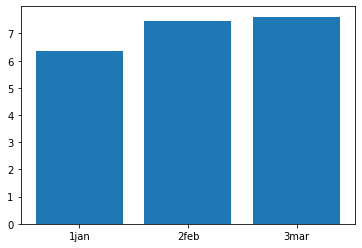

In [24]:
fig, ax = plt.subplots()
ax.bar(mean_total_inv.index, mean_total_inv.total)
plt.show()

In [13]:
df3['ship_to'] = ['delhi', 'gurgaon', 'faridabad']
df3

iid  cid   inv_date     total    ship_to
0    7   14 2009-03-01  7.481229      delhi
1    8   16 2009-03-02  8.903443    gurgaon
2    9   18 2009-03-03  6.465113  faridabad

In [14]:
df_jan_mar = pd.concat([df1, df3], sort=True)
df_jan_mar

cid  iid   inv_date    ship_to     total
0    2    1 2009-01-01        NaN  6.852990
1    4    2 2009-01-02        NaN  5.300034
2    6    3 2009-01-03        NaN  6.947175
0   14    7 2009-03-01      delhi  7.481229
1   16    8 2009-03-02    gurgaon  8.903443
2   18    9 2009-03-03  faridabad  6.465113

In [15]:
pd.concat([df1,df3], join='inner')

iid  cid   inv_date     total
0    1    2 2009-01-01  6.852990
1    2    4 2009-01-02  5.300034
2    3    6 2009-01-03  6.947175
0    7   14 2009-03-01  7.481229
1    8   16 2009-03-02  8.903443
2    9   18 2009-03-03  6.465113

In [17]:
df1.append([df2, df3], ignore_index=True, sort=True)

cid  iid   inv_date    ship_to     total
0    2    1 2009-01-01        NaN  6.852990
1    4    2 2009-01-02        NaN  5.300034
2    6    3 2009-01-03        NaN  6.947175
3    8    4 2009-02-01        NaN  8.118141
4   10    5 2009-02-02        NaN  7.006668
5   12    6 2009-02-03        NaN  7.241675
6   14    7 2009-03-01      delhi  7.481229
7   16    8 2009-03-02    gurgaon  8.903443
8   18    9 2009-03-03  faridabad  6.465113

In [18]:
pd.concat([df1, df2, df3], ignore_index=True)

iid  cid   inv_date     total    ship_to
0    1    2 2009-01-01  6.852990        NaN
1    2    4 2009-01-02  5.300034        NaN
2    3    6 2009-01-03  6.947175        NaN
3    4    8 2009-02-01  8.118141        NaN
4    5   10 2009-02-02  7.006668        NaN
5    6   12 2009-02-03  7.241675        NaN
6    7   14 2009-03-01  7.481229      delhi
7    8   16 2009-03-02  8.903443    gurgaon
8    9   18 2009-03-03  6.465113  faridabad

## Verifying integrity

Possible merging issue:
* Unintentional one-to-many relationship
* Unintentional many-to-many relationship

In [25]:
tracks_dict = {
    'tid': [2, 3, 4],
    'name': ['Balls', 'Shark', 'Restless'],
    'aid': [2, 3, 3],
    'mtid': [2, 2, 2],
    'gid': [1, 1, 1],
    'u_price': [0.99, 0.99, 0.99]
}

specs_dict = {
    'tid': [2, 3, 2],
    'msecs': [342562, 230619, 252051],
    'bytes': [5510424, 3990994, 4331779]
}
tracks = pd.DataFrame(tracks_dict)
specs = pd.DataFrame(specs_dict)
print("tracks:")
print(tracks)
print("specs")
print(specs)

tracks:
   tid      name  aid  mtid  gid  u_price
0    2     Balls    2     2    1     0.99
1    3     Shark    3     2    1     0.99
2    4  Restless    3     2    1     0.99
specs
   tid   msecs    bytes
0    2  342562  5510424
1    3  230619  3990994
2    2  252051  4331779


In [35]:
import traceback

In [36]:
# merge validate
try:
    tracks.merge(specs, on='tid', validate='one_to_one')
except Exception:
    traceback.print_exc()

Traceback (most recent call last):
  File "<ipython-input-36-289ea6787d3a>", line 3, in <module>
    tracks.merge(specs, on='tid', validate='one_to_one')
  File "/home/arunkhattri/.pyenv/versions/3.8.2/envs/env382/lib/python3.8/site-packages/pandas/core/frame.py", line 7284, in merge
    return merge(
  File "/home/arunkhattri/.pyenv/versions/3.8.2/envs/env382/lib/python3.8/site-packages/pandas/core/reshape/merge.py", line 73, in merge
    op = _MergeOperation(
  File "/home/arunkhattri/.pyenv/versions/3.8.2/envs/env382/lib/python3.8/site-packages/pandas/core/reshape/merge.py", line 637, in __init__
    self._validate(validate)
  File "/home/arunkhattri/.pyenv/versions/3.8.2/envs/env382/lib/python3.8/site-packages/pandas/core/reshape/merge.py", line 1258, in _validate
    raise MergeError(
pandas.errors.MergeError: Merge keys are not unique in right dataset; not a one-to-one merge


In [37]:
try:
    tracks.merge(specs, on='tid', validate='one_to_one')
except Exception as e:
    print(f"{type(e)}: {e}")

<class 'pandas.errors.MergeError'>: Merge keys are not unique in right dataset; not a one-to-one merge


In [40]:
try:
    tracks_specs = tracks.merge(specs, on='tid', validate='one_to_many')
    print(tracks_specs)
except Exception as e:
    print(f"{type(e)}: {e}")


   tid   name  aid  mtid  gid  u_price   msecs    bytes
0    2  Balls    2     2    1     0.99  342562  5510424
1    2  Balls    2     2    1     0.99  252051  4331779
2    3  Shark    3     2    1     0.99  230619  3990994


In [46]:
inv_feb_dict = {
    'iid': np.arange(7, 10),
    'cid': np.arange(38, 43, 2),
    'inv_dt': pd.date_range('2009-02-01', '2009-02-03'),
    'total': np.random.rand(3) * 100
}

inv_mar_dict = {
    'iid': np.arange(9, 16, 3),
    'cid': np.arange(19, 22 ),
    'inv_dt': pd.date_range('2009-03-01', '2009-03-03'),
    'total': np.random.rand(3) * 100
}

inv_feb = pd.DataFrame(inv_feb_dict).set_index('iid', drop=True)
inv_mar = pd.DataFrame(inv_mar_dict).set_index('iid', drop=True)

print("inv_feb")
print(inv_feb)
print("inv_mar")
print(inv_mar)

inv_feb
     cid     inv_dt      total
iid                           
7     38 2009-02-01  25.560072
8     40 2009-02-02  81.001661
9     42 2009-02-03  44.628906
inv_mar
     cid     inv_dt      total
iid                           
9     19 2009-03-01  28.613673
12    20 2009-03-02  98.346403
15    21 2009-03-03  22.683767


In [49]:
try:
    print(pd.concat([inv_feb, inv_mar], verify_integrity=True))
except Exception as e:
    print(f"{type(e)}: {e}")

<class 'ValueError'>: Indexes have overlapping values: Int64Index([9], dtype='int64', name='iid')


In [48]:
try:
    print(pd.concat([inv_feb, inv_mar], verify_integrity=False))
except Exception:
    traceback.print_exc()

     cid     inv_dt      total
iid                           
7     38 2009-02-01  25.560072
8     40 2009-02-02  81.001661
9     42 2009-02-03  44.628906
9     19 2009-03-01  28.613673
12    20 2009-03-02  98.346403
15    21 2009-03-03  22.683767
